# Finale Auswertung KI_3

In diesem Abschnitt werden die Daten der finalen KI/EA visualisiert.
Diese besitzt nun zusätzlich zwei zeitabhängige Varianten der Gene zwischen denen die KI interpoliert.
Jedes Gen: 
<strong> def1, off1, supp1 und def2, off2, supp2 </strong>
besitzt wieder die gleichen fünf Eigenschaften:
<strong>ConquerRadius, AttackMinLife, SupportRadius, SupportMaxCap und SupportMinCap</strong>.

Alles Weitere ist wie in der Auswertung der KI_2.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
df_EA = pd.read_csv('Data/FINAL.csv', index_col=[0], sep=';')
#df_EA = pd.read_csv('Data/EA3_win.csv', index_col=[0], sep=';')

evolutions = df_EA.groupby(df_EA.index).size().iloc[:1].values # get the number of evolutions
KINumber = df_EA.groupby(df_EA.index).size().size # get the number of different KIs (individuals)
df_EA['Evolution'] = np.arange(evolutions).repeat(KINumber) # add new evolution column
df_EA = df_EA.reset_index().set_index(['Evolution', 'Name']) #make multiindex

### Calulate more Data for analysis
df_Mean = df_EA.groupby(level=0).agg(['mean']).stack(1) # calc mean for every evolution
df_Mean = df_Mean.reset_index().set_index(['Evolution']) #remove multiindex
df_Mean.drop(['Winner', "level_1"], axis=1, inplace=True) # remove useless columns
### Calculates the win percentage of each evolution.
df_wincounter = df_EA.groupby(level=0)['Winner'].value_counts().unstack(fill_value=0).stack().to_frame()
df_cleaned = df_wincounter.rename(columns={0: "WinPercent"}).reset_index().set_index(['Evolution'])
df_winner = df_cleaned.loc[df_cleaned['Winner'] == True]
df_winner.drop(['Winner'], axis=1) # remove useless columns
df_Mean['WinPercent'] = df_winner['WinPercent'].apply(lambda x: x / KINumber * 100) # calculate winpercentage
### Calculate standard deviation
df_standardDeviation = df_EA.std(axis = 0, skipna = True, level = 0)
df_standardDeviation.drop(['Winner', "Fitness", "Score", "GameTime"], axis=1, inplace=True)

# gets the single pareto-fronts
domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
df_oneGeneration = df_EA.iloc[df_EA.index.get_level_values('Evolution') == 0]
df_Mean

,Fitness,GameTime,Score,deffScore,suppScore,townLifeDeviation,supportActions,attackActions,dominanceLevel,deff1-ConquerRadius,deff1-AttackMinLife,deff1-SupportRadius,deff1-SupportMaxCap,deff1-SupportMinCap,off1-ConquerRadius,off1-AttackMinLife,off1-SupportRadius,off1-SupportMaxCap,off1-SupportMinCap,supp1-ConquerRadius,supp1-AttackMinLife,supp1-SupportRadius,supp1-SupportMaxCap,supp1-SupportMinCap,SupportTownRatio1,DeffTownRatio1,AtkTownRatio1,CategorisationRadius1,deff2-ConquerRadius,deff2-AttackMinLife,deff2-SupportRadius,deff2-SupportMaxCap,deff2-SupportMinCap,off2-ConquerRadius,off2-AttackMinLife,off2-SupportRadius,off2-SupportMaxCap,off2-SupportMinCap,supp2-ConquerRadius,supp2-AttackMinLife,supp2-SupportRadius,supp2-SupportMaxCap,supp2-SupportMinCap,SupportTownRatio,DeffTownRatio,AtkTownRatio,CategorisationRadius,WinPercent
Evolution,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1.610000,594.155,0.320000,-1.95,0.020000,50.00000,0.020,0.320,1.00,2070.295,54.430,1984.145,50.820,52.115,2076.095,53.445,1917.295,54.550,46.935,2148.225,54.775,2204.535,53.630,50.100,51.055,51.635,49.825,2104.815,2097.410,52.160,2010.835,51.580,49.500,1933.805,51.370,1968.935,53.165,53.275,2070.725,50.140,1969.680,50.325,48.850,47.465,48.480,48.250,2082.925,0.0
1,-4.935000,717.615,0.885000,-5.90,0.080000,49.84120,0.080,0.885,1.00,1943.550,56.885,2094.300,54.940,53.700,2155.685,52.725,1931.905,53.080,46.945,2134.860,57.005,2141.270,54.785,49.155,48.980,45.180,47.405,2044.040,2181.540,50.035,2165.395,52.135,51.320,1927.020,52.665,1947.525,51.600,54.025,2073.855,46.370,2028.080,46.325,48.925,47.310,48.980,46.360,2028.150,0.0
2,-15.315000,650.135,2.380000,-17.85,0.155000,49.06735,0.155,2.755,1.00,2039.260,54.610,2085.610,55.360,50.170,2063.790,46.000,1963.115,54.440,46.370,2075.965,56.370,2101.545,55.700,49.510,45.355,38.345,47.495,1855.425,2116.260,51.135,2307.395,51.085,51.380,1882.565,48.710,1992.015,50.425,51.385,1994.190,48.130,1858.715,48.510,51.815,46.060,43.420,47.365,2065.750,0.0
3,-22.820000,678.425,3.695000,-26.95,0.435000,48.08240,0.505,4.070,1.00,1986.830,58.130,2212.565,53.320,44.470,2004.895,42.025,1971.990,54.975,48.010,1820.240,54.920,2116.535,55.770,49.885,45.150,31.715,48.875,1662.470,2082.475,52.480,2333.400,49.480,49.595,1621.260,47.765,1927.410,51.055,50.635,1793.585,46.465,1906.855,51.330,50.455,45.615,37.100,48.190,2080.015,0.0
4,-3.783623,601.630,1.668043,-6.15,0.698333,49.77950,0.115,1.590,1.00,1777.155,58.025,2308.355,52.485,46.315,2035.030,42.880,2010.690,53.945,48.655,1889.010,55.905,2063.040,55.900,46.500,41.815,33.115,44.775,1589.460,2010.785,51.675,2365.605,54.275,46.775,1743.135,46.760,2008.090,47.465,51.270,1756.590,51.380,1842.360,50.875,50.390,43.605,38.045,44.465,2086.725,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,141.786917,745.570,66.615320,1.55,73.621597,25.72110,77.160,49.320,5.20,1718.390,55.425,2513.615,44.135,49.185,2215.430,26.835,1581.620,54.280,73.490,2621.880,48.555,1648.735,36.100,56.480,16.260,14.690,66.540,2837.105,1321.070,36.410,2630.425,61.900,50.825,1061.295,21.315,1740.130,55.635,87.950,2259.625,41.100,1932.695,48.705,60.315,16.035,35.130,44.550,2588.825,60.5
25,164.709315,779.580,78.578839,0.05,86.080477,21.12045,80.835,62.530,5.42,1691.045,56.690,2504.020,43.965,49.650,2468.580,22.450,1320.415,60.515,73.295,2639.680,50.605,1732.040,36.970,57.740,10.545,8.500,73.735,3072.925,1192.830,35.100,2732.345,64.335,49.875,1088.335,17.725,1593.955,59.775,95.730,2369.915,40.725,1920.275,49.115,63.900,14.600,34.565,45.070,2581.590,71.0
26,194.926542,794.080,90.111697,6.35,98.464845,16.52545,92.775,62.920,5.35,1616.935,57.300,2537.735,43.785,52.650,2581.970,17.040,1035.870,65.690,67.620,2575.310,53.365,1861.770,39.050,57.540,8.905,7.040,83.180,3122.100,1066.215,33.925,2869.130,66.195,50.045,1096.385,14.020,1461.275,63.195,101.760,2486.675,40.940

## 2D Auswertung

Einige beispielhafte Plots sind in folgendem Graphen zu sehen.
Es können Werte aus unterschiedlichen Tabellen (<strong>df_Mean, df_oneGeneration, df_standardDeviation, df_EA</strong>) dargestellt und verglichen werden. Tabellen sowie Eigenschaften können einfach im unteren Codeteil ausgetauscht werden.
ALLERDINGS passen sich die Beschriftungen am Graphen nicht automatisch an.

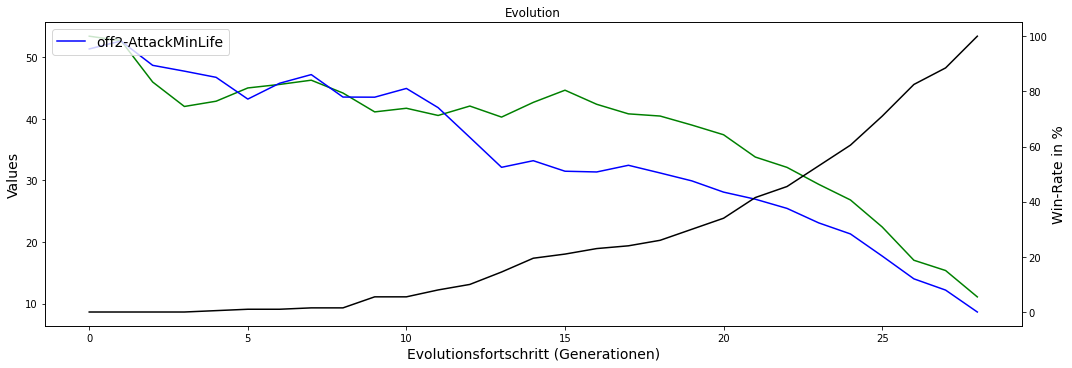

In [16]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Evolutionsfortschritt (Generationen)', fontsize=14)
ax1.set_ylabel('Values', fontsize=14)

Values, = ax1.plot(df_Mean["off1-AttackMinLife"].values, color='green', label='off1-AttackMinLife')
Values, = ax1.plot(df_Mean["off2-AttackMinLife"].values, color='blue', label='off2-AttackMinLife')
#Values, = ax1.plot(df_oneGeneration["Score"].values, color='red', label='Score')
#Values, = ax1.plot(df_oneGeneration["suppScore"].values, color='green', label='suppScore')
#std, = ax1.plot(df_standardDeviation["off1-AttackMinLife"].values, color='blue', label='off1-AttackMinLife')
#std1, = ax1.plot(df_standardDeviation["off2-AttackMinLife"].values, color='red', label='off2-AttackMinLife')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color='black'
ax2.set_ylabel('Win-Rate in %', color=color, fontsize=14)
#ax2.plot(df_oneGeneration["Winner"].values, color=color)
ax2.plot(df_Mean["WinPercent"].values, color=color)
#ax2.plot(df_EA["Fitness"].values, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('Evolution')
plt.legend(handles = [Values], fontsize=14)
plt.show()

## 3D Analyse der Pareto-front

Dieser Teil visualisiert die Entwicklung des EA in 3D.
Aufgrund der nun drei verschiedenen Gene ist eine Visualisierung in 3D sinnvoll.
Es werden die Daten aus dem ersten, obigen Codeteil benötigt.

<IPython.core.display.Javascript object>


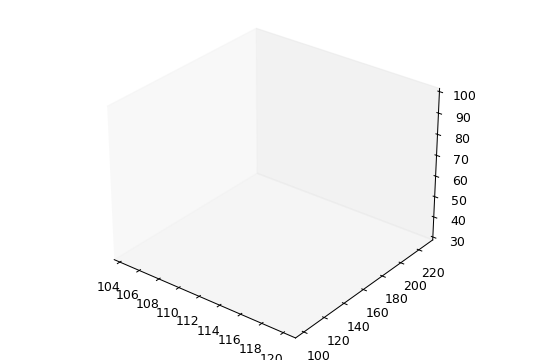

In [7]:
%matplotlib notebook
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d as plt3d

fig = plt.figure()
ax = plt3d.Axes3D(fig)

ax.view_init(45, -45)
ax.grid(False)
# fixed length of axis
#ax.set_zlim(-100, 0)
#plt.xlim(0, 600)
#plt.ylim(0, 50)
colors1 = cm.colors.LinearSegmentedColormap.from_list("", ["red","red"])
colors2 = cm.colors.LinearSegmentedColormap.from_list("", ["green","green"])
colors3 = cm.colors.LinearSegmentedColormap.from_list("", ["blue","blue"])

domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
domi4 = df_EA[df_EA['dominanceLevel'] == 4]
domi = domi4.iloc[domi4.index.get_level_values('Evolution') == 27]

# Data for scattered points
zdata = domi["deffScore"].values
xdata = domi["Score"].values
ydata = domi["suppScore"].values

#points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors, vmin=-85, vmax=-10);
points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
#ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis', edgecolor='none');
ax.set_title('Score');
ax.set_xlabel('Attack')
ax.set_ylabel('Support')
ax.set_zlabel('Defensive');


def animate_scatters(iteration, points,zdata,ydata,xdata):
    domiA = domi1.iloc[domi1.index.get_level_values('Evolution') == iteration]
    domiB = domi2.iloc[domi2.index.get_level_values('Evolution') == iteration]
    domiC = domi3.iloc[domi3.index.get_level_values('Evolution') == iteration]
    
    ax.clear()
    ax.grid(False)
    # fixed length of axis
    #ax.set_zlim(-500, 0)
    #plt.xlim(0, 1500)
    #plt.ylim(0, 100)
    
    # Data for scattered points
    zdata = domiA["deffScore"].values
    xdata = domiA["Score"].values
    ydata = domiA["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
    zdata = domiB["deffScore"].values
    xdata = domiB["Score"].values
    ydata = domiB["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors2)
    zdata = domiC["deffScore"].values
    xdata = domiC["Score"].values
    ydata = domiC["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors3)
    
    return points

# animate the 3d plot
anim = animation.FuncAnimation(fig, animate_scatters, fargs=(points,zdata,ydata,xdata), interval=1000, blit=False)
plt.show()